# Global Fashion Brands: An Exploratory Analysis
## by Ikenna Chukwudum

## Introduction
> For the analysis of the fashion brands, we used 2 datasets: "fashion_brand_details.xlsx" with 1020 entries and 2 fields; and "fashion_dataset.csv" with 14329 entries and 9 columns. The analysis was started by merging these 2 datasets after importing them as dataframes into the notebook.

> The new dataframe, after cleaning with python and merging with SQL, was explored to answer the questions on if poorly rated products should be discarded and whether black clothes are more highly rated and pricier than clothes of other colours. Also, attributes of the different products were examined and predictive analysis was carried out on the price of the commodities using machine learning.
  
> Further analysis and filtering was done with Spark, including map reduce. Thereafter, visualization to show the correlation between price and average rating was carried out with both seaborn and Power BI.


## Preliminary Wrangling

In [1]:
# Imported numpy and pandas packages for cleaning 

import numpy as np
import pandas as pd


> The analysis was started by reading the datasets "fashion_dataset.csv" and "fashion_brand_details.xlsx" to the dataframes design1_df and design2_df respectively, and thereafter investigating them

In [2]:
# The os library was imported to ensure datasets could be located in the directory
import os
wd = os.getcwd()  
files = os.listdir(wd)  # Get all the files in that directory
list(files)

['.ipynb_checkpoints',
 'ALX PROJECTS',
 'bigdata digram.pbix',
 'bigdataassignment_2.ipynb',
 'bigdataassignment_2.pdf',
 'blackaprdts.csv',
 'blackbprdts.csv',
 'blackcprdts.csv',
 'blackcprdtsattr.csv',
 'blackprdts.csv',
 'blackxprdts.csv',
 'cars.csv',
 'cars.csv.1',
 'cars.csv.2',
 'cars.csv.3',
 'classwork 02-12.ipynb',
 'copy1.ipynb',
 'Data_Analysis_Lecture_DAT (1).ipynb',
 'Decision Tree classification.ipynb',
 'done_assign_2.ipynb',
 'fashion1_master.csv',
 'fashionbrands_sql.db',
 'fashionbrandx_sql.db',
 'fashionbrandy_sql.db',
 'fashionbrandz_sql.db',
 'fashionbrand_sql.db',
 'fashionbrnd_sql.db',
 'fashion_brand_details.xlsx',
 'fashion_dataset.csv',
 'fashion_master.csv',
 'fashion_sql.db',
 'filteredblackprdts.csv',
 'i-Copy1.ipynb',
 'i.ipynb',
 'jupyter_sql.db',
 'LowertRatedMovieSpark.txt',
 'Multiple Regression-2 Complete.ipynb',
 'PySpark (1).ipynb',
 'real_estate.csv',
 'review prdts visual.pbix',
 'review prdts visual.pdf',
 'reviewprdts.csv',
 'spark-3.1.1-bin-

> The first data frame design1_df

In [3]:
design1_df = pd.read_csv("fashion_dataset.csv")

In [4]:
design1_df.head(3)

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."


In [5]:
design1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14311 non-null  float64
 1   name          14310 non-null  object 
 2   price         14310 non-null  float64
 3   colour        14307 non-null  object 
 4   brand         14305 non-null  object 
 5   ratingCount   6581 non-null   float64
 6   avg_rating    6581 non-null   float64
 7   description   14310 non-null  object 
 8   p_attributes  14310 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1007.6+ KB


In [6]:
# The .info() method showed a number of empty entries especially in ratingCount and avg_rating columns
# There were also missing entries in every other column
# The missing values in product ID column were filled with zeros; the price, rating count and average rating
#columns were filled with their means and all missing string values were filled with 'NA'

design1_df['p_id'] = design1_df['p_id'].fillna(0).astype(int) 

In [7]:
# These float data type columns filled with the mean of the entries

design1_df['avg_rating'].fillna(design1_df['avg_rating'].mean(), inplace=True)
design1_df['ratingCount'].fillna(design1_df['ratingCount'].mean(), inplace=True)
design1_df['price'].fillna(design1_df['price'].mean(), inplace=True)

In [8]:
# String columns filled with 'NA'

design1_df[['name','colour','brand','description','p_attributes']] = design1_df[['name','colour','brand','description','p_attributes']].fillna('NA') 

In [9]:
# Results of initial wrangling investigated

design1_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


In [10]:
design1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14329 non-null  int32  
 1   name          14329 non-null  object 
 2   price         14329 non-null  float64
 3   colour        14329 non-null  object 
 4   brand         14329 non-null  object 
 5   ratingCount   14329 non-null  float64
 6   avg_rating    14329 non-null  float64
 7   description   14329 non-null  object 
 8   p_attributes  14329 non-null  object 
dtypes: float64(3), int32(1), object(5)
memory usage: 951.7+ KB


In [11]:
# Avg_rating and price columns were rounded up to 2 decimal places and rating count changed to an integer for convenience
# Since p_id is immutable, it is set as string data type

design1_df[['avg_rating','price']] = round(design1_df[['avg_rating','price']], 2)
design1_df['ratingCount'] = design1_df['ratingCount'].astype(int)
design1_df['p_id'] = design1_df['p_id'].astype(str)

In [12]:
design1_df.tail()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
14324,17029604,The Chennai Silks Pink & Silver-Toned Floral Z...,3999.0,Pink,The Chennai Silks,184,4.1,<b>Design Details </b><ul><li>Pink and silver-...,"{'Better Cotton Initiative': 'Regular', 'Blous..."
14325,17600212,Kinder Kids Girls Blue & Green Printed Foil Pr...,2050.0,Blue,Kinder Kids,184,4.1,"Blue and green printed lehenga choli, has foi...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Cot..."
14326,18159266,KLOTTHE Women Green & Black Floral Printed Pal...,1659.0,Green,KLOTTHE,184,4.1,<ul> <li> Green and black woven palazzos </li>...,{'Body or Garment Size': 'To-Fit Denotes Body ...
14327,18921114,InWeave Women Red Printed A-Line Skirt,2399.0,Red,InWeave,184,4.1,"<p>Red printed A-line skirt, has drawstring cl...","{'Add-Ons': 'NA', 'Body Shape ID': '324,333,42..."
14328,19361058,BoStreet Women Navy Blue Tapered Fit Trousers,2599.0,Navy Blue,BoStreet,184,4.1,<ul> <li> Navy blue knitted trousers </li> <li...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,42..."


In [13]:
# Checked for duplicates

design1_df['p_id'].duplicated().sum()

106

In [14]:
# Dropped duplicates

design1_df.drop_duplicates(['p_id'], inplace=True)

In [15]:
# Product id 'p_id' set as index

design1_df.set_index('p_id', inplace=True)

In [16]:
# Cleaned data frame

design1_df.head(3)

,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
p_id,,,,,,,,
1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.55,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
5829334,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462,4.31,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
10340119,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145,4.07,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."


In [17]:
design1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14223 entries, 1518329 to 19361058
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          14223 non-null  object 
 1   price         14223 non-null  float64
 2   colour        14223 non-null  object 
 3   brand         14223 non-null  object 
 4   ratingCount   14223 non-null  int32  
 5   avg_rating    14223 non-null  float64
 6   description   14223 non-null  object 
 7   p_attributes  14223 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 944.5+ KB


> The second data frame design2_df

In [18]:
design2_df = pd.read_excel("fashion_brand_details.xlsx")


In [19]:
# The second data frame was investigated using .describe(), .info(), .isnull() as well as duplicates checked

design2_df.head()

,brand_id,brand_name
0,1,513
1,2,109F
2,3,20Dresses
3,4,250 Designs
4,5,3Pin


In [20]:
design2_df.describe()

,brand_id
count,1020.000000
mean,510.500000
std,294.592939
min,1.000000
25%,255.750000
50%,510.500000
75%,765.250000
max,1020.000000


In [21]:
design2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand_id    1020 non-null   int64 
 1   brand_name  1020 non-null   object
dtypes: int64(1), object(1)
memory usage: 16.1+ KB


In [22]:
design2_df.isnull().sum()

brand_id      0
brand_name    0
dtype: int64

In [23]:
design2_df.duplicated().sum()

0

In [24]:
# Index was set as brand_id as there were similarities between brand_id and the newly created index

design2_df.set_index('brand_id', inplace=True)

In [25]:
design2_df.head()

,brand_name
brand_id,
1,513
2,109F
3,20Dresses
4,250 Designs
5,3Pin


## Merging the data frames with SQL

In [26]:
# In order to merge the 2 dataframes using SQL's INNER JOIN on dataframes design1_df and design2_df, sqlite3 was imported
#and ipython-sql was installed

import sqlite3

In [27]:
!pip install ipython-sql

In [28]:
# A database was created

cnn = sqlite3.connect('fashionbrands_sql.db') 

In [29]:
# design1_df was loaded to the database

design1_df.to_sql('fashiondataQ', cnn)

14223

In [30]:
#design2_df was loaded to the database

design2_df.to_sql('fashiondataR', cnn)

1020

In [31]:
%load_ext sql  

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [32]:
%sql sqlite:///fashionbrands_sql.db

In [33]:
#created the master fashion data frame from SQL's INNER JOIN merge

fashion_master_df = pd.read_sql("""
                    SELECT *
                    FROM fashiondataQ as a
                    INNER JOIN fashiondataR as b
                    ON a.brand=b.brand_name
                    """, con = cnn)

In [34]:
fashion_master_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.55,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242,Dupatta Bazaar
1,5829334,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462,4.31,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm...",750,Roadster
2,10340119,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145,4.07,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt...",389,Inddus
3,12384822,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260,4.08,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo...",482,Kotty
4,14021452,Sera Women Multicoloured Printed Tie-Up Shrug,1494.0,Multi,Sera,750,4.29,"Brown and blue printed tie-up longline shrug, ...",{'Body or Garment Size': 'To-Fit Denotes Body ...,793,Sera


In [35]:
fashion_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          8052 non-null   object 
 1   name          8052 non-null   object 
 2   price         8052 non-null   float64
 3   colour        8052 non-null   object 
 4   brand         8052 non-null   object 
 5   ratingCount   8052 non-null   int64  
 6   avg_rating    8052 non-null   float64
 7   description   8052 non-null   object 
 8   p_attributes  8052 non-null   object 
 9   brand_id      8052 non-null   int64  
 10  brand_name    8052 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 692.1+ KB


In [36]:
# Dataframe moved to csv file

fashion_master_df.to_csv('fashion1_master.csv', index=False)

## Questions

>Q1: What were the products with an average rating of 3.0 and below? Information on this would determine whether product will be discarded or improved.

In [37]:
# Data frame was created to review products of rating 3.0 and lower

review_prdts_df = fashion_master_df[fashion_master_df['avg_rating'] <= 3].sort_values('price', ascending=True)

In [38]:
review_prdts_df.reset_index(drop=True, inplace=True)

In [39]:
review_prdts_df

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,1411010,Dupatta Bazaar Beige Striped Chanderi Cotton S...,449.0,Beige,Dupatta Bazaar,6,2.83,"Beige striped dupatta,&nbsp;has a zari border ...","{'Ornamentation': 'Zari', 'Print or Pattern Ty...",242,Dupatta Bazaar
1,14745736,Baby Lakshmi Girls Orange & Off White Ready to...,698.0,Orange,Baby Lakshmi,1,2.00,"Orange and off white solid lehenga choli,<br>O...","{'Blouse Closure': 'Button', 'Blouse Fabric': ...",108,Baby Lakshmi
2,13278842,Bronz Women Off-White Printed Tunic,699.0,Off White,Bronz,12,2.83,"Off-White printed Tunic, has a round neck, and...",{'Body or Garment Size': 'To-Fit Denotes Body ...,152,Bronz
3,18290008,Go Colors Women Black Tapered Fit Trousers,799.0,Black,Go Colors,2,3.00,<ul> <li> Black woven trousers </li> <li> Tape...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,42...",338,Go Colors
4,11524932,Vishudh Women's Mustard & Pink Striped Tunic,849.0,Mustard,Vishudh,13,2.31,"Mustard and Pink striped Tunic, has a mandarin...",{'Body or Garment Size': 'Garment Measurements...,962,Vishudh
...,...,...,...,...,...,...,...,...,...,...,...
129,12418562,Geroo Jaipur Hand Dyed Bandhani Sea Green Silk...,8999.0,Sea Green,Geroo Jaipur,5,2.60,Sea Green lehenga choli<br>Pink and Golden wov...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Art...",327,Geroo Jaipur
130,16877276,Mitera Women Purple & Silver Embroidered Lehen...,9600.0,Purple,Mitera,3,3.00,Purple and silver embroidered lehenga choli wi...,"{'Blouse Closure': 'Zip', 'Blouse Fabric': 'Po...",583,Mitera
131,15344604,Chhabra 555 Teal Green Embroidered Zardozi Mad...,9900.0,Teal,Chhabra 555,2,3.00,Bring your dream look to life with this fashio...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Pol...",173,Chhabra 555
132,14539442,Chhabra 555 Sea Green & Gold-Toned Embellished...,11900.0,Sea Green,Chhabra 555,3,2.67,Sea green and gold-toned embellished lehenga c...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Net...",173,Chhabra 555


In [40]:
# The least price in the master dataset

fashion_master_df['price'].min()

295.0

> Answer 1: The fashion retail companies are advised to not discard the average rated products but rather improve them. This is because these products still generate revenue from per unit sale well above the least sale price of 295 dollars. Hence, products being discarded could reduce profit margins

>Q2: This question explored brand name, description, average rating and price of products that were of colour black. How much did fashion companies actually make from black products?

In [41]:
# Creating the black products dataframe

black_prdts_df = fashion_master_df[fashion_master_df['colour'] == 'Black'].sort_values('price', ascending=False)

In [42]:
# Dropping any new index created

black_prdts_df.reset_index(drop=True, inplace=True)

In [43]:
black_prdts_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,16920516,Masaba Woman Black Tulip Cape Set,30000.0,Black,Masaba,184,4.10,V-neckline&nbsp;<br>Full sleeves&nbsp;<br>Embr...,"{'Add-Ons': 'NA', 'Better Cotton Initiative': ...",553,Masaba
1,18585472,Mitera Black & Pink Floral Pure Linen Saree,22300.0,Black,Mitera,184,4.10,<b> Design Details </b> <ul> <li> Black and pi...,"{'Blouse': 'Blouse Piece', 'Blouse Fabric': 'P...",583,Mitera
2,13168738,Justanned Plus Women Plus Size Black Solid Lea...,19999.0,Black,Justanned,184,4.10,"Black solid jacket, has a spread collar, 6 poc...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...",442,Justanned
3,17981980,Justanned Women Black Leather Lightweight Crop...,19998.0,Black,Justanned,184,4.10,Black solid lightweight biker jacket with zip...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",442,Justanned
4,15880878,Justanned Women Black Striped Leather Crop Out...,15998.0,Black,Justanned,6,4.67,Black solid striped biker jacket with zip det...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",442,Justanned


In [44]:
# Selecting required fields

filtered_black_prdts_df = black_prdts_df.loc[:,['brand_name','avg_rating','price', 'description']]

In [45]:
filtered_black_prdts_df.head()

,brand_name,avg_rating,price,description
0,Masaba,4.10,30000.0,V-neckline&nbsp;<br>Full sleeves&nbsp;<br>Embr...
1,Mitera,4.10,22300.0,<b> Design Details </b> <ul> <li> Black and pi...
2,Justanned,4.10,19999.0,"Black solid jacket, has a spread collar, 6 poc..."
3,Justanned,4.10,19998.0,Black solid lightweight biker jacket with zip...
4,Justanned,4.67,15998.0,Black solid striped biker jacket with zip det...


In [46]:
filtered_black_prdts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand_name   1049 non-null   object 
 1   avg_rating   1049 non-null   float64
 2   price        1049 non-null   float64
 3   description  1049 non-null   object 
dtypes: float64(2), object(2)
memory usage: 32.9+ KB


In [47]:
# There are 1,049 black clothes

filtered_black_prdts_df.describe()

,avg_rating,price
count,1049.000000,1049.000000
mean,4.103365,2623.678742
std,0.327403,2208.596538
min,1.670000,295.000000
25%,4.100000,1499.000000
50%,4.100000,1999.000000
75%,4.210000,2990.000000
max,5.000000,30000.000000


In [48]:
# 268 brands made black clothes

len(filtered_black_prdts_df['brand_name'].unique())

268

In [49]:
# Percentage of black products was approximately 13%

per_blck = (len(black_prdts_df)/len(fashion_master_df))*100
per_blck

13.02781917536016

In [50]:
# Dataframe moved to csv file

filtered_black_prdts_df.to_csv('upfilteredblackprdts.csv', index=False)

In [51]:
# Average price of black clothes

filtered_black_prdts_df['price'].mean()

2623.6787416587226

In [52]:
# Average price of all clothes

fashion_master_df['price'].mean()

2876.9600099354197

In [53]:
# Mean of average rating

filtered_black_prdts_df['avg_rating'].mean()

4.103365109628194

> Answer 2: The findings showed that the average pricing of black clothes was £2623.68. This was lower than the general average of £2876.96 but close enough to it. The average rating though remained high with a mean of over 4.10. Hence, black clothes generally had above average rating despite their average sale price.

## MongoDB application to product attributes field, p_attributes

> Looking further into black coloured products and their attributes breakdown using MongoDB

In [54]:
# Filtered for product attributes and brand name

mongofiltered_black_prdts_df = black_prdts_df[['brand_name','p_attributes']]

In [55]:
mongofiltered_black_prdts_df

,brand_name,p_attributes
0,Masaba,"{'Add-Ons': 'NA', 'Better Cotton Initiative': ..."
1,Mitera,"{'Blouse': 'Blouse Piece', 'Blouse Fabric': 'P..."
2,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
3,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
...,...,...
1044,Soch,"{'Border': 'Woven Design', 'Fabric': 'Art Silk..."
1045,Zivame,"{'Add-Ons': 'NA', 'Body Shape ID': '443,324,42..."
1046,Friskers,"{'Body Shape ID': '333,424', 'Body or Garment ..."
1047,Bewakoof,{'Body or Garment Size': 'To-Fit Denotes Body ...


In [56]:
mongofiltered_black_prdts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand_name    1049 non-null   object
 1   p_attributes  1049 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


In [57]:
# Exploring the attributes

mongofiltered_black_prdts_df['p_attributes']

0       {'Add-Ons': 'NA', 'Better Cotton Initiative': ...
1       {'Blouse': 'Blouse Piece', 'Blouse Fabric': 'P...
2       {'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...
3       {'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...
4       {'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...
                              ...                        
1044    {'Border': 'Woven Design', 'Fabric': 'Art Silk...
1045    {'Add-Ons': 'NA', 'Body Shape ID': '443,324,42...
1046    {'Body Shape ID': '333,424', 'Body or Garment ...
1047    {'Body or Garment Size': 'To-Fit Denotes Body ...
1048    {'Body Shape ID': '333,424', 'Body or Garment ...
Name: p_attributes, Length: 1049, dtype: object

In [58]:
# ast library imported to change the attributes data type from string to dictionary

from ast import literal_eval

In [59]:
mongofiltered_black_prdts_df['Attributes'] = mongofiltered_black_prdts_df['p_attributes'].apply(lambda x: literal_eval(x))

C:\Users\IKENNA\AppData\Local\Temp\ipykernel_41756\297140986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mongofiltered_black_prdts_df['Attributes'] = mongofiltered_black_prdts_df['p_attributes'].apply(lambda x: literal_eval(x))


In [60]:
mongofiltered_black_prdts_df.head()

,brand_name,p_attributes,Attributes
0,Masaba,"{'Add-Ons': 'NA', 'Better Cotton Initiative': ...","{'Add-Ons': 'NA', 'Better Cotton Initiative': ..."
1,Mitera,"{'Blouse': 'Blouse Piece', 'Blouse Fabric': 'P...","{'Blouse': 'Blouse Piece', 'Blouse Fabric': 'P..."
2,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
3,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...","{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...","{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."


In [61]:
type(mongofiltered_black_prdts_df['Attributes'][0])

dict

In [62]:
mongofiltered_black_prdts_df.drop('p_attributes', axis=1, inplace=True)

C:\Users\IKENNA\AppData\Local\Temp\ipykernel_41756\1633810029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mongofiltered_black_prdts_df.drop('p_attributes', axis=1, inplace=True)


In [63]:
mongofiltered_black_prdts_df.head()

,brand_name,Attributes
0,Masaba,"{'Add-Ons': 'NA', 'Better Cotton Initiative': ..."
1,Mitera,"{'Blouse': 'Blouse Piece', 'Blouse Fabric': 'P..."
2,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
3,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,Justanned,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."


In [64]:
# The filtered dataframe is moved to csv to be imported to mongoDB Compass for further analysis

mongofiltered_black_prdts_df.to_csv('blackcprdts.csv', index=False)

In [65]:
# To work in the notebook, pymongo is installed and imported

!pip install pymongo

In [66]:
import pymongo

In [67]:
# Server is set at localhost:27017

client = pymongo.MongoClient("localhost", 27017)

In [68]:
# The database is created and named

db = client.fashiondb

In [69]:
db.name

'fashiondb'

In [70]:
# The list of databases at localhost 27017

client.list_database_names()

['admin', 'config', 'fashiondb', 'local']

In [71]:
# A collection is created

coll = db.products_attributes

In [72]:
# Details on the product attributes collection

db.products_attributes

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'fashiondb'), 'products_attributes')

In [73]:
db.list_collection_names()

['products_attributes']

In [74]:
# Collection has 1049 documents

coll.count_documents({})

1049

In [75]:
# Selected a document

coll.find_one()

{'_id': ObjectId('63872b29c557eb483de5b023'),
 'brand_name': 'Masaba',
 'p_attributes': "{'Add-Ons': 'NA', 'Better Cotton Initiative': 'Regular', 'Bottom Closure': 'Zip', 'Bottom Fabric': 'Silk Blend', 'Bottom Pattern': 'Printed', 'Bottom Type': 'Trousers', 'Character': 'NA', 'Lining': 'NA', 'Neck': 'Round Neck', 'Number of Pockets': 'NA', 'Occasion': 'Casual', 'Sleeve Length': 'Long Sleeves', 'Sustainable': 'Regular', 'Top Fabric': 'Silk Blend', 'Top Pattern': 'Solid', 'Top Type': 'Top', 'Trends': 'NA', 'Wash Care': 'Dry Clean'}"}

In [76]:
# Filtered and selected several documents

cur = coll.find({'brand_name': "Columbia"}, {'p_attributes': 1, '_id': 1})
for doc in cur:
    print(doc)

{'_id': ObjectId('63872b29c557eb483de5b029'), 'p_attributes': "{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Body or Garment Size': 'Garment Measurements in', 'Character': 'NA', 'Closure': 'Zip', 'Collar': 'Hooded', 'Fabric': 'Nylon', 'Features': 'Reflective Strip', 'Hemline': 'Straight', 'Length': 'Longline', 'Lining Fabric': 'Polyester', 'Main Trend': 'NA', 'Number of Pockets': '3', 'Occasion': 'Sports', 'Pattern': 'Solid', 'Print or Pattern Type': 'Solid', 'Sleeve Length': 'Long Sleeves', 'Sport': 'Outdoor', 'Surface Styling': 'NA', 'Sustainable': 'Regular', 'Technology': 'NA', 'Technology Present': 'Yes', 'Type': 'Padded Jacket', 'Wash Care': 'Machine Wash', 'Weave Type': 'Woven', 'Where-to-wear': ''}"}
{'_id': ObjectId('63872b29c557eb483de5b02d'), 'p_attributes': "{'Add-Ons': 'NA', 'Body Shape ID': '333,424', 'Body or Garment Size': 'Garment Measurements in', 'Character': 'NA', 'Closure': 'Zip', 'Collar': 'Hooded', 'Contact Brand or Retailer for pre-sales product queries': 'chogori i

## Working with Spark(PySpark)

In [77]:
# PySpark and sparksql were installed

!pip install pyspark

In [78]:
!pip install sparksql-magic

In [79]:
# Checked the directory and initiated a spark session

!dir

 Volume in drive C is Windows
 Volume Serial Number is EA12-F56B

 Directory of C:\Users\IKENNA\bigdatatechassignments

01/01/2023  22:48    <DIR>          .
14/12/2022  01:29    <DIR>          ..
01/01/2023  06:58    <DIR>          .ipynb_checkpoints
19/12/2022  06:40    <DIR>          ALX PROJECTS
07/12/2022  19:47            36,803 bigdata digram.pbix
27/12/2022  06:52           701,009 bigdataassignment_2.ipynb
08/12/2022  18:53         3,265,308 bigdataassignment_2.pdf
06/12/2022  17:38           652,203 blackaprdts.csv
06/12/2022  17:44               478 blackbprdts.csv
01/01/2023  22:47           607,034 blackcprdts.csv
06/12/2022  16:36           596,797 blackcprdtsattr.csv
30/11/2022  09:44           607,036 blackprdts.csv
06/12/2022  14:41           607,036 blackxprdts.csv
12/10/2022  19:59            22,608 cars.csv
12/10/2022  19:59            22,608 cars.csv.1
13/12/2022  21:21            22,608 cars.csv.2
13/12/2022  21:21            22,608 cars.csv.3
07/12/2022  19:47   

In [80]:
pwd

'C:\\Users\\IKENNA\\bigdatatechassignments'

In [81]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [82]:
# Loaded the master data from csv to a dataframe using spark

fashionspark_df = spark.read.csv('fashion1_master.csv', header=True, sep=",")
fashionspark_df.show(5, truncate=True)

+--------+--------------------+------+-------+--------------+-----------+----------+--------------------+--------------------+--------+--------------+
|    p_id|                name| price| colour|         brand|ratingCount|avg_rating|         description|        p_attributes|brand_id|    brand_name|
+--------+--------------------+------+-------+--------------+-----------+----------+--------------------+--------------------+--------+--------------+
| 1518329|Dupatta Bazaar Wh...| 899.0|  White|Dupatta Bazaar|       1321|      4.55|White embroidered...|{'Occasion': 'Dai...|     242|Dupatta Bazaar|
| 5829334|Roadster Women Mu...|1199.0|Mustard|      Roadster|       5462|      4.31|"Mustard yellow s...|{'Body Shape ID':...|     750|      Roadster|
|10340119|Inddus Peach-Colo...|5799.0|  Peach|        Inddus|        145|      4.07|Peach-Coloured an...|{'Bottom Fabric':...|     389|        Inddus|
|12384822|Kotty Women Black...|1999.0|  Black|         Kotty|      12260|      4.08|"Black dar

In [83]:
# Explored the columns

fashionspark_df.columns

['p_id',
 'name',
 'price',
 'colour',
 'brand',
 'ratingCount',
 'avg_rating',
 'description',
 'p_attributes',
 'brand_id',
 'brand_name']

In [84]:
# Explored the schema to see column data types

fashionspark_df.printSchema()

root
 |-- p_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: string (nullable = true)
 |-- colour: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- ratingCount: string (nullable = true)
 |-- avg_rating: string (nullable = true)
 |-- description: string (nullable = true)
 |-- p_attributes: string (nullable = true)
 |-- brand_id: string (nullable = true)
 |-- brand_name: string (nullable = true)



In [85]:
from pyspark.sql.types import *

In [86]:
# Created a list of the schema in the format column, data type
labels = [
     ('p_id',StringType()),
     ('name',StringType()),
     ('price',DoubleType()),
     ('colour',StringType()),
     ('brand',StringType()),
     ('ratingCount',IntegerType()),
     ('avg_rating',DoubleType()),
     ('description',StringType()),
     ('p_attributes',StringType()),
     ('brand_id',IntegerType()),
     ('brand_name',StringType())
]


In [87]:
# Used StructType method to examine the schema

schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType(List(StructField(p_id,StringType,true),StructField(name,StringType,true),StructField(price,DoubleType,true),StructField(colour,StringType,true),StructField(brand,StringType,true),StructField(ratingCount,IntegerType,true),StructField(avg_rating,DoubleType,true),StructField(description,StringType,true),StructField(p_attributes,StringType,true),StructField(brand_id,IntegerType,true),StructField(brand_name,StringType,true)))

In [88]:
# Updated column data types

fashionspark_df = spark.read.csv('fashion1_master.csv', header=True, sep=",", schema=schema)
fashionspark_df.printSchema()

root
 |-- p_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- colour: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- ratingCount: integer (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- description: string (nullable = true)
 |-- p_attributes: string (nullable = true)
 |-- brand_id: integer (nullable = true)
 |-- brand_name: string (nullable = true)



In [89]:
# Selected required columns

fashionspark_df.select(fashionspark_df['brand_name'],fashionspark_df['p_id'],fashionspark_df['price'],fashionspark_df['colour'],\
                                         fashionspark_df['avg_rating']).show(truncate=True)

+--------------------+--------+------+-------+----------+
|          brand_name|    p_id| price| colour|avg_rating|
+--------------------+--------+------+-------+----------+
|      Dupatta Bazaar| 1518329| 899.0|  White|      4.55|
|            Roadster| 5829334|1199.0|Mustard|      4.31|
|              Inddus|10340119|5799.0|  Peach|      4.07|
|               Kotty|12384822|1999.0|  Black|      4.08|
|                Sera|14021452|1494.0|  Multi|      4.29|
|       Tokyo Talkies|14063026| 699.0|  Black|      4.53|
|               Anouk|14324806|4699.0|  Black|      3.81|
|            Roadster|14955068|2599.0|  Mauve|      4.21|
|       Tokyo Talkies|16827132|1399.0| Maroon|      3.91|
|           Khushal K|17048614|5099.0|  Black|      4.42|
|           Anubhutee|17413232|1739.0|   Pink|      4.25|
|               Styli|18841352|1949.0|   Gold|       4.1|
|                 171| 8317561|1699.0|   Blue|      4.31|
|              Inddus| 8340727|6549.0|   Pink|      3.99|
|       Tokyo 

In [90]:
fashionspark_df.columns

['p_id',
 'name',
 'price',
 'colour',
 'brand',
 'ratingCount',
 'avg_rating',
 'description',
 'p_attributes',
 'brand_id',
 'brand_name']

In [91]:
# Renamed the columns

fashionspark_df = fashionspark_df.withColumnRenamed('p_id', 'product_id') \
        .withColumnRenamed('ratingCount', 'rating_count') \
        .withColumnRenamed('avg_rating', 'average_rating') \
        .withColumnRenamed('p_attributes', 'product_attributes')
fashionspark_df.show(truncate=True)

+----------+--------------------+------+-------+-----------------+------------+--------------+--------------------+--------------------+--------+--------------------+
|product_id|                name| price| colour|            brand|rating_count|average_rating|         description|  product_attributes|brand_id|          brand_name|
+----------+--------------------+------+-------+-----------------+------------+--------------+--------------------+--------------------+--------+--------------------+
|   1518329|Dupatta Bazaar Wh...| 899.0|  White|   Dupatta Bazaar|        1321|          4.55|White embroidered...|{'Occasion': 'Dai...|     242|      Dupatta Bazaar|
|   5829334|Roadster Women Mu...|1199.0|Mustard|         Roadster|        5462|          4.31|"Mustard yellow s...|{'Body Shape ID':...|     750|            Roadster|
|  10340119|Inddus Peach-Colo...|5799.0|  Peach|           Inddus|         145|          4.07|Peach-Coloured an...|{'Bottom Fabric':...|     389|              Inddus

In [92]:
# Grouped dataframe by brand name and colour

fashionspark_df.groupBy('brand_name', 'colour').count().orderBy('count', ascending=False).show(10)

+--------------+------+-----+
|    brand_name|colour|count|
+--------------+------+-----+
|      Roadster|  Blue|   83|
| Tokyo Talkies|  Blue|   52|
|           H&M| Black|   45|
| Tokyo Talkies| Black|   42|
| Tokyo Talkies| Green|   42|
|      Roadster| Black|   36|
|          null|Mitera|   33|
|          null|   170|   29|
|           H&M| Beige|   27|
|Clora Creation| Black|   27|
+--------------+------+-----+
only showing top 10 rows



In [93]:
# Dropped brand and product attributes columns

fashionspark_df = fashionspark_df.drop('brand') \
       .drop('product_attributes')
fashionspark_df.show(5,truncate=True)

+----------+--------------------+------+-------+------------+--------------+--------------------+--------+--------------+
|product_id|                name| price| colour|rating_count|average_rating|         description|brand_id|    brand_name|
+----------+--------------------+------+-------+------------+--------------+--------------------+--------+--------------+
|   1518329|Dupatta Bazaar Wh...| 899.0|  White|        1321|          4.55|White embroidered...|     242|Dupatta Bazaar|
|   5829334|Roadster Women Mu...|1199.0|Mustard|        5462|          4.31|"Mustard yellow s...|     750|      Roadster|
|  10340119|Inddus Peach-Colo...|5799.0|  Peach|         145|          4.07|Peach-Coloured an...|     389|        Inddus|
|  12384822|Kotty Women Black...|1999.0|  Black|       12260|          4.08|"Black dark wash ...|     482|         Kotty|
|  14021452|Sera Women Multic...|1494.0|  Multi|         750|          4.29|Brown and blue pr...|     793|          Sera|
+----------+------------

In [94]:
from pyspark.sql.functions import *

In [95]:
# Filtered rows based on colour and avergae rating conditions

fashionspark_df.filter((col('colour')=='White') & (col('average_rating')>=2.50)).show(truncate=True)

+----------+--------------------+------+------+------------+--------------+--------------------+--------+--------------+
|product_id|                name| price|colour|rating_count|average_rating|         description|brand_id|    brand_name|
+----------+--------------------+------+------+------------+--------------+--------------------+--------+--------------+
|   1518329|Dupatta Bazaar Wh...| 899.0| White|        1321|          4.55|White embroidered...|     242|Dupatta Bazaar|
|  11697268|Roadster Women Wh...| 499.0| White|        3106|           4.3|"White printed de...|     750|      Roadster|
|  10711448|Dupatta Bazaar Wo...| 599.0| White|        1531|          4.54|White solid dupat...|     242|Dupatta Bazaar|
|  19147754|H&M Women White S...|1499.0| White|         184|           4.1|"White solid a-li...|     353|           H&M|
|  13736998|Athena White Tie-...|1699.0| White|        2200|          4.19|<ul><li>Colour: w...|      95|        Athena|
|  10182385|Style Quotient Wo...

In [96]:
# Showed unique brand names

fashionspark_df.select('brand_name','name').distinct().show()

+--------------+--------------------+
|    brand_name|                name|
+--------------+--------------------+
|           750|Roadster Women Pe...|
|      Roadster|Roadster Women Bl...|
|          null|{'Better Cotton I...|
|      Indo Era|Indo Era Women Bl...|
|      Roadster|The Roadster Life...|
|          Biba|Biba Red & Beige ...|
|          null|Wuxi Orange & Gol...|
|       Emprall|Emprall Multicolo...|
| Tokyo Talkies|Tokyo Talkies Bla...|
|          Biba|Biba Women Navy B...|
| Tokyo Talkies|Tokyo Talkies Wom...|
|         Libas|Libas Women Burgu...|
|         Bronz|Bronz Women Green...|
|   Belle Fille|Belle Fille Women...|
|         Anouk|Anouk Women Rust ...|
|          null| Do not bleach</p...|
|     Indibelle|Indibelle Women Y...|
|Clora Creation|Clora Creation Cr...|
|         Styli|Styli Green Geome...|
| Tokyo Talkies|Tokyo Talkies Wom...|
+--------------+--------------------+
only showing top 20 rows



In [97]:
# Multiple flitering and total count of H&M and Levis using 'union' method

black_HnM_clothes = fashionspark_df.filter((col('brand_name')=='H&M') & (col('colour')=='Black'))
blue_levis_clothes = fashionspark_df.filter((col('brand_name')=='Levis') & (col('colour')=='Blue'))
print("Black H&Ms: "+str(black_HnM_clothes.count()))
print("Blue Levis: "+str(blue_levis_clothes.count()))
print("Total Black H&M and Blue Levi CLothes: "+str(black_HnM_clothes.union(blue_levis_clothes).count()))

Black H&Ms: 45
Blue Levis: 27
Total Black H&M and Blue Levi CLothes: 72


In [162]:
# Applied RDD

fashionsparkdf = spark.sparkContext.textFile('fashion_master.csv')
print(fashionsparkdf.first())
fashionsparkdf_header = fashionsparkdf.first()
fashionsparkdf_rest = fashionsparkdf.filter(lambda line: line!=fashionsparkdf_header)
print(fashionsparkdf_rest.first())

brand_id,brand_name,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
1,513,13158392,513 Women Black & Grey Woven-Design Kimono Shrug,1699.0,Black,513,136,4.57,"Grey and black woven-design Kimono Shrug, has a solid border<p>Acrylic<br>Machine-wash</p>","{'Better Cotton Initiative': 'Regular', 'Fabric': 'Acrylic', 'Front Styling': 'Open Front', 'Hemline': 'Asymmetric', 'Length': 'Longline', 'Main Trend': 'Monochrome', 'Occasion': 'Casual', 'Pattern': 'Checked', 'Sleeve Length': 'Long Sleeves', 'Surface Styling': 'NA', 'Sustainable': 'Regular', 'Wash Care': 'Machine Wash'}"


In [163]:
# Using mapreduce, the number of products are counted

fashionsparkdf_rest.map(lambda x: x.split(";")).count()

8302

## Machine Learning

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
# Used the black products dataframe

black_prdts_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,16920516,Masaba Woman Black Tulip Cape Set,30000.0,Black,Masaba,184,4.10,V-neckline&nbsp;<br>Full sleeves&nbsp;<br>Embr...,"{'Add-Ons': 'NA', 'Better Cotton Initiative': ...",553,Masaba
1,18585472,Mitera Black & Pink Floral Pure Linen Saree,22300.0,Black,Mitera,184,4.10,<b> Design Details </b> <ul> <li> Black and pi...,"{'Blouse': 'Blouse Piece', 'Blouse Fabric': 'P...",583,Mitera
2,13168738,Justanned Plus Women Plus Size Black Solid Lea...,19999.0,Black,Justanned,184,4.10,"Black solid jacket, has a spread collar, 6 poc...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod...",442,Justanned
3,17981980,Justanned Women Black Leather Lightweight Crop...,19998.0,Black,Justanned,184,4.10,Black solid lightweight biker jacket with zip...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",442,Justanned
4,15880878,Justanned Women Black Striped Leather Crop Out...,15998.0,Black,Justanned,6,4.67,Black solid striped biker jacket with zip det...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",442,Justanned


In [102]:
# Filtered further by dropping all rows with rating count equalling zero

black_prdts_mldf = black_prdts_df[black_prdts_df['ratingCount'] != 0]

In [103]:
black_prdts_mldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          1049 non-null   object 
 1   name          1049 non-null   object 
 2   price         1049 non-null   float64
 3   colour        1049 non-null   object 
 4   brand         1049 non-null   object 
 5   ratingCount   1049 non-null   int64  
 6   avg_rating    1049 non-null   float64
 7   description   1049 non-null   object 
 8   p_attributes  1049 non-null   object 
 9   brand_id      1049 non-null   int64  
 10  brand_name    1049 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 98.3+ KB


In [104]:
# Chose to focus the model on average rating, rating count and price

focus_1 = black_prdts_mldf.loc[:,['avg_rating','ratingCount','price']]

In [105]:
focus_1.head()

,avg_rating,ratingCount,price
0,4.10,184,30000.0
1,4.10,184,22300.0
2,4.10,184,19999.0
3,4.10,184,19998.0
4,4.67,6,15998.0


In [106]:
# Imported Normalizer in order to preprocess the focused data and bring them to scale

from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='max')

In [107]:
focus_1[['avg_rating', 'ratingCount', 'price']]  = normalizer.fit_transform(focus_1[['avg_rating', 'ratingCount', 'price']])

In [108]:
focus_1.head()

,avg_rating,ratingCount,price
0,0.000137,0.006133,1.0
1,0.000184,0.008251,1.0
2,0.000205,0.009200,1.0
3,0.000205,0.009201,1.0
4,0.000292,0.000375,1.0


> Using linear regression

In [109]:
# Created the X and y dataframes

X = pd.DataFrame(focus_1['avg_rating'])
y = pd.DataFrame(focus_1['price'])

In [110]:
#Trained the model on X for avg_rating and y for price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [111]:
X_train

,avg_rating
796,0.002735
142,0.000750
550,0.002051
451,0.001822
209,0.001243
...,...
360,0.001641
466,0.001864
299,0.001465
493,0.001787


In [112]:
# Assigned the model

model_LR = LinearRegression()

In [113]:
# Fitted the model to the training set

model_LR.fit(X_train, y_train)

LinearRegression()

In [114]:
# Predicted using the test set

y_pred = model_LR.predict(X_test)

In [115]:
#Taking a look into X_test with 20 percent test set and 80 percent train set

X_test

,avg_rating
347,0.001689
614,0.002159
700,0.001995
947,0.003656
705,0.002572
...,...
903,0.003420
620,0.002169
1005,0.004127
924,0.003162


In [116]:
# Prediction of first 10 results

y_pred[0:10]

array([[0.99252353],
       [0.99271392],
       [0.99264764],
       [0.99332   ],
       [0.99288113],
       [0.9921499 ],
       [0.99241951],
       [0.99256186],
       [0.99214501],
       [0.9928168 ]])

In [117]:
# Checked accuracy of the model

model_LR.score(X_test, y_test)

0.0005899455605113957

In [118]:
# Explored the errors

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.014983112465987432
Mean Squared Error:  0.0037374819138062923
Root Mean Squared Error:  0.06113494838311628


> Using multiple regression

In [119]:
# Used more independent variables for a multiple regression

X1 = pd.DataFrame(focus_1[['avg_rating', 'ratingCount']])
X1

,avg_rating,ratingCount
0,0.000137,0.006133
1,0.000184,0.008251
2,0.000205,0.009200
3,0.000205,0.009201
4,0.000292,0.000375
...,...,...
1044,0.008233,0.369478
1045,0.008970,0.214141
1046,0.008577,1.000000
1047,0.010276,0.461153


In [120]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [121]:
model_LR.fit(X1_train, y1_train)

LinearRegression()

In [122]:
y1_pred = model_LR.predict(X1_test)

In [123]:
# Results using multiple regression

y1_pred[0:10]

array([[0.98984365],
       [0.99269703],
       [0.99142294],
       [1.02715041],
       [0.86457251],
       [0.9999197 ],
       [1.0075999 ],
       [0.99334251],
       [1.00254201],
       [0.99226031]])

In [124]:
# In order to see the graphical corretation between actual and predicted outputs,set plots imported to be embedded inline

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

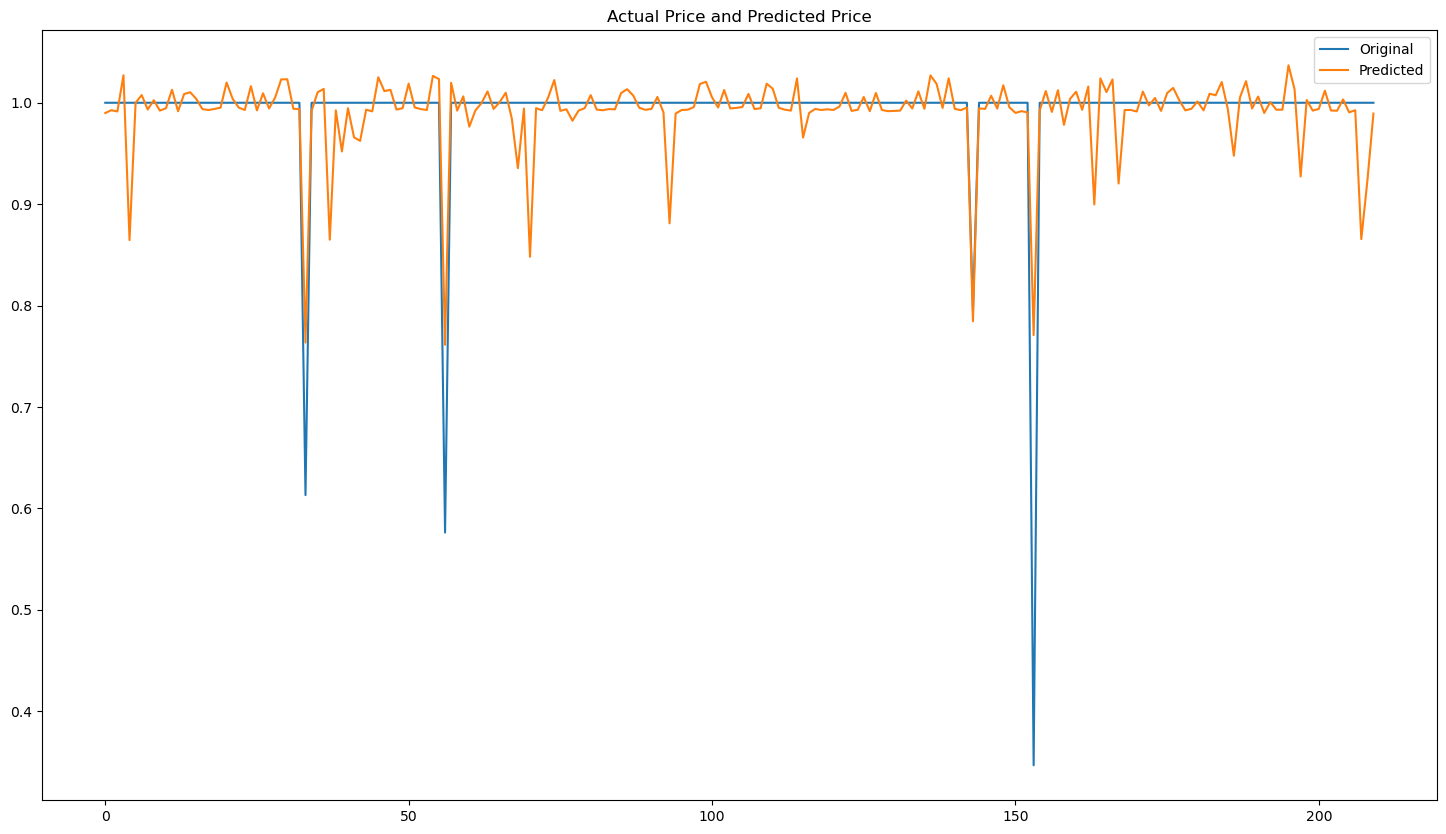

In [125]:
plt.figure(figsize=(18,10))
x_axis=range(len(y1_test))
plt.plot(x_axis, y1_test, label='Original')
plt.plot(x_axis, y1_pred, label='Predicted')
plt.title('Actual Price and Predicted Price')
plt.legend()
plt.show()

In [126]:
model_LR.score(X1_test, y1_test)

0.4991957115238791

In [127]:
# Multiple regression errors

print('Mean Absolute Error: ', mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error: ', mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error:  0.018288417068626876
Mean Squared Error:  0.0018728518511712251
Root Mean Squared Error:  0.04327645839450388


> Using support vector regression

In [128]:
# Used support vector regression to back up results

from sklearn.svm import SVR

In [129]:
# Modelled using linear SVR

model_SV = SVR(kernel = 'linear')

In [130]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [131]:
model_SV.fit(X2_train, y2_train)

C:\Users\IKENNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [132]:
y2_pred = model_SV.predict(X2_test)

In [133]:
# Results using linear SVR

y2_pred

array([1.07108304, 1.06915003, 1.06945332, 1.09639587, 0.89548159,
       1.09551287, 1.09756698, 1.07454359, 1.09911093, 1.06550088,
       1.08505128, 1.0992009 , 1.06034692, 1.09679001, 1.0987164 ,
       1.09944984, 1.07833846, 1.07028243, 1.07911771, 1.08962797,
       1.09805191, 1.09888117, 1.09033654, 1.07070078, 1.09263501,
       1.06742687, 1.09808921, 1.08332527, 1.09193376, 1.09890985,
       1.09629324, 1.0805203 , 1.0780602 , 0.7799143 , 1.06333399,
       1.08194874, 1.09497493, 0.86094055, 1.06744505, 0.99221978,
       1.08542883, 1.03238778, 1.02747983, 1.07337915, 1.05955087,
       1.0953917 , 1.0804729 , 1.0871578 , 1.07397431, 1.08542515,
       1.0995442 , 1.0917386 , 1.07785102, 1.07070078, 1.08738744,
       1.09575862, 0.77991085, 1.09820949, 1.06550088, 1.09769577,
       1.02874378, 1.06742687, 1.08031213, 1.09918767, 1.07949407,
       1.08394167, 1.09857018, 1.04217575, 0.98185657, 1.08283539,
       0.86815753, 1.08542883, 1.06915003, 1.09931028, 1.09895

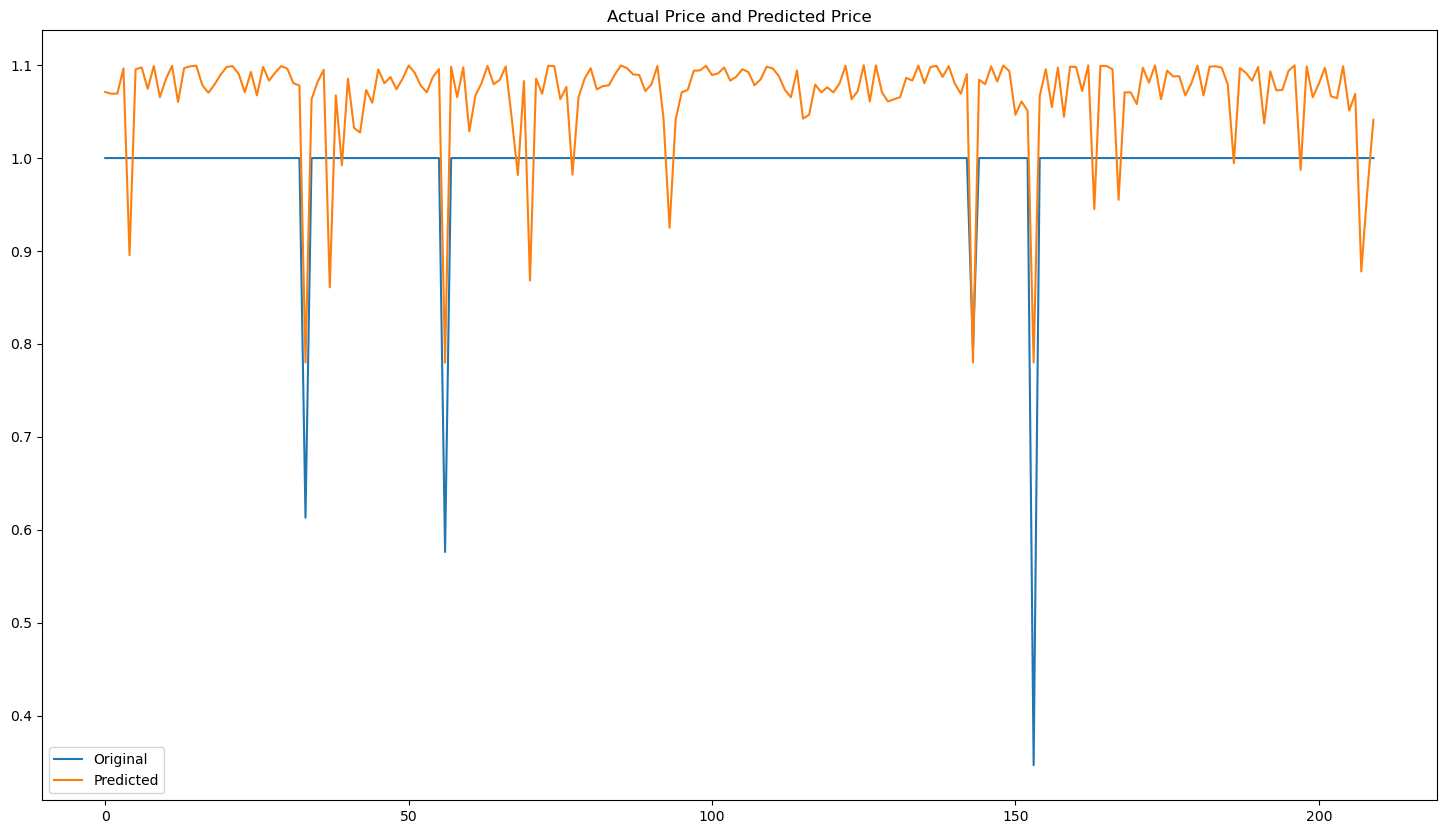

In [134]:
plt.figure(figsize=(18,10))
x_axis=range(len(y2_test))
plt.plot(x_axis, y2_test, label='Original')
plt.plot(x_axis, y2_pred, label='Predicted')
plt.title('Actual Price and Predicted Price')
plt.legend()
plt.show()

In [135]:
model_SV.score(X2_test, y2_test)

-1.118273164926109

In [136]:
# Errors using linear SVR

print('Mean Absolute Error: ', mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error: ', mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error:  0.08230146899683417
Mean Squared Error:  0.007921681002952026
Root Mean Squared Error:  0.08900382577705312


> It was observed that the multiple linear regression errors and SVR errors had similar values

> Using KMeans Clustering

In [137]:
# Imported KMeans and MinMaxScaler from the sklearn library

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [138]:
# Filtered for the attributes to be analysed using KMeans

focus_2 = black_prdts_mldf.loc[:,['avg_rating','price']]

In [139]:
# Reasserted attributes in focus

rating = focus_2['avg_rating']
pricing = focus_2['price']

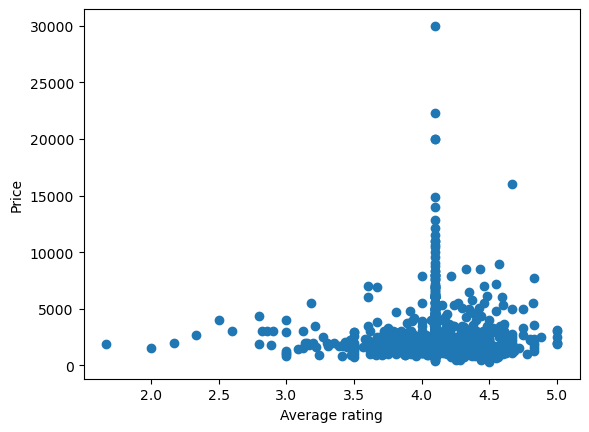

In [140]:
# Examined the data points

plt.scatter(rating, pricing)
plt.xlabel('Average rating')
plt.ylabel('Price');

In [141]:
# Calculated the elbow point for best number of clusters k using sum of squares error sse/ inertia

k_range=range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(focus_2[['avg_rating','price']])
    sse.append(km.inertia_) 

sse

C:\Users\IKENNA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[5112037915.07396,
 2281052220.373087,
 1189361837.4235616,
 706125223.3310348,
 472795094.5967941,
 323034080.88589936,
 253512698.77917242,
 189728891.35611627,
 138311786.7314675]

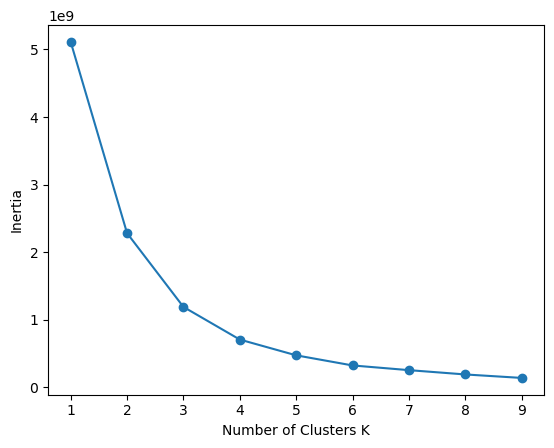

In [142]:
# Plotted inertia vs number of clusters to better determine the elbow point

plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.plot(k_range, sse, '-o');

In [143]:
# Set an instance of KMeans with number of clusters = 4
# 4 was chosen as the elbow point as there was no significant decrease in inertia from that point

km= KMeans(n_clusters=4, random_state=0)

In [144]:
# Fitted the KMeans to focus_2 df to determine the cluster groupings

y3_pred= km.fit_predict(focus_2)

y3_pred

array([2, 2, 2, ..., 1, 1, 1])

In [145]:
set(y3_pred) # To see the unnique values of y3_pred, "set" function was used

{0, 1, 2, 3}

In [146]:
km.cluster_centers_  # .cluster_centers_ attribute was used to determine the co-ordinates of the cluster centroids

array([[4.09540650e+00, 3.52556098e+03],
       [4.10180690e+00, 1.69437379e+03],
       [4.18142857e+00, 1.95991429e+04],
       [4.13915493e+00, 7.31459155e+03]])

In [147]:
# Cluster column was created

focus_2['cluster']=y3_pred
focus_2

,avg_rating,price,cluster
0,4.10,30000.0,2
1,4.10,22300.0,2
2,4.10,19999.0,2
3,4.10,19998.0,2
4,4.67,15998.0,2
...,...,...,...
1044,4.10,498.0,1
1045,4.44,495.0,1
1046,4.28,489.0,1
1047,4.10,399.0,1


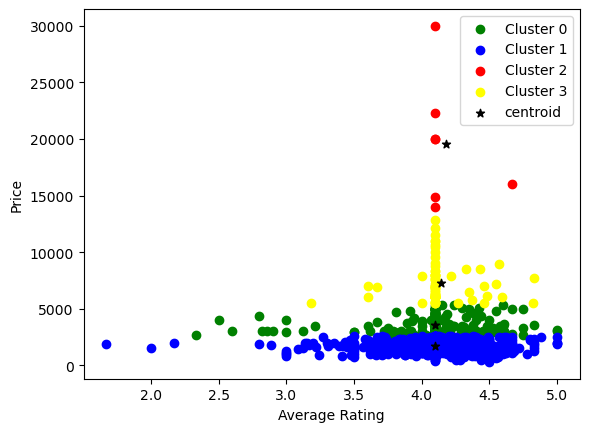

In [148]:
# Dataframes were created and plotted with regards to their cluster grouping of 0,1,2 or 3

focus_2_c0= focus_2[focus_2.cluster==0]
focus_2_c1= focus_2[focus_2.cluster==1]
focus_2_c2= focus_2[focus_2.cluster==2]
focus_2_c3= focus_2[focus_2.cluster==3]

plt.scatter(focus_2_c0['avg_rating'], focus_2_c0['price'], label='Cluster 0', color='green')
plt.scatter(focus_2_c1['avg_rating'], focus_2_c1['price'], label='Cluster 1',color='blue')
plt.scatter(focus_2_c2['avg_rating'], focus_2_c2['price'], label='Cluster 2',color='red')
plt.scatter(focus_2_c3['avg_rating'], focus_2_c3['price'], label='Cluster 3',color='yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='black', marker='*', label ='centroid')


plt.xlabel('Average Rating')
plt.ylabel('Price')
plt.legend();

In [149]:
# MinMaxScaler was used to preprocess the price and average rating entries to a range scale for more accurate output

scaler=MinMaxScaler()
scaler.fit(focus_2[['price']])
focus_2[['price']]= scaler.transform(focus_2[['price']])

scaler.fit(focus_2[['avg_rating']])
focus_2[['avg_rating']]= scaler.transform(focus_2[['avg_rating']])

focus_2

,avg_rating,price,cluster
0,0.729730,1.000000,2
1,0.729730,0.740784,2
2,0.729730,0.663323,2
3,0.729730,0.663289,2
4,0.900901,0.528632,2
...,...,...,...
1044,0.729730,0.006834,1
1045,0.831832,0.006733,1
1046,0.783784,0.006531,1
1047,0.729730,0.003501,1


In [150]:
# focus_2 df was sliced for needed columns and instanced as kfocus_2

kfocus_2 = focus_2[['avg_rating','price']]
kfocus_2

,avg_rating,price
0,0.729730,1.000000
1,0.729730,0.740784
2,0.729730,0.663323
3,0.729730,0.663289
4,0.900901,0.528632
...,...,...
1044,0.729730,0.006834
1045,0.831832,0.006733
1046,0.783784,0.006531
1047,0.729730,0.003501


In [151]:
# kfocus_2 was fitted to KMeans

y3_pred = km.fit_predict(kfocus_2)
y3_pred

array([0, 0, 0, ..., 3, 2, 3])

In [152]:
# The updated centroids after scaling are generated

km.cluster_centers_

array([[0.74328382, 0.2781682 ],
       [0.47637779, 0.06030948],
       [0.71959569, 0.06452473],
       [0.84439485, 0.0601119 ]])

In [153]:
# New_cluster column is generated to show the updated cluster groupings after scaling

focus_2['New_cluster']=y3_pred
focus_2

,avg_rating,price,cluster,New_cluster
0,0.729730,1.000000,2,0
1,0.729730,0.740784,2,0
2,0.729730,0.663323,2,0
3,0.729730,0.663289,2,0
4,0.900901,0.528632,2,0
...,...,...,...,...
1044,0.729730,0.006834,1,2
1045,0.831832,0.006733,1,3
1046,0.783784,0.006531,1,3
1047,0.729730,0.003501,1,2


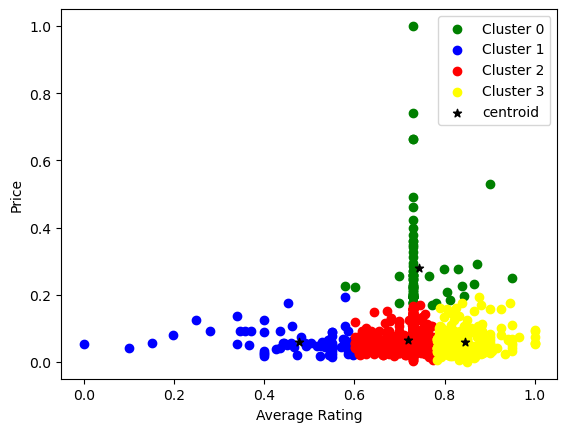

In [154]:
# Dataframe was sliced and plotted with regards to the updated cluster groupings 

focus_2_c0= focus_2[focus_2.New_cluster==0]
focus_2_c1= focus_2[focus_2.New_cluster==1]
focus_2_c2= focus_2[focus_2.New_cluster==2]
focus_2_c3= focus_2[focus_2.New_cluster==3]

plt.scatter(focus_2_c0['avg_rating'], focus_2_c0['price'], label='Cluster 0', color='green')
plt.scatter(focus_2_c1['avg_rating'], focus_2_c1['price'], label='Cluster 1',color='blue')
plt.scatter(focus_2_c2['avg_rating'], focus_2_c2['price'], label='Cluster 2',color='red')
plt.scatter(focus_2_c3['avg_rating'], focus_2_c3['price'], label='Cluster 3',color='yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='black', marker='*', label ='centroid')


plt.xlabel('Average Rating')
plt.ylabel('Price')
plt.legend();


> Based on the KMeans cluster analysis, it was observed that most products were above average and had an affordable price, both of which are good for the ever-growing fashion industry. The clusters were largely divided into those with medium average rating and low price, above medium average rating and low price, high average rating and low price and above medium to high average rating and a higher price. Based on the cluster a product fell into, fashion brands could determine the changes required to meet the needs of their shareholders and consumers.

## Visualizations

In [155]:
# Imported set plots to be embedded inline

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [156]:
# Adopted the products reviewed with low ratings for the visualizations

review_prdts_df.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes,brand_id,brand_name
0,1411010,Dupatta Bazaar Beige Striped Chanderi Cotton S...,449.0,Beige,Dupatta Bazaar,6,2.83,"Beige striped dupatta,&nbsp;has a zari border ...","{'Ornamentation': 'Zari', 'Print or Pattern Ty...",242,Dupatta Bazaar
1,14745736,Baby Lakshmi Girls Orange & Off White Ready to...,698.0,Orange,Baby Lakshmi,1,2.00,"Orange and off white solid lehenga choli,<br>O...","{'Blouse Closure': 'Button', 'Blouse Fabric': ...",108,Baby Lakshmi
2,13278842,Bronz Women Off-White Printed Tunic,699.0,Off White,Bronz,12,2.83,"Off-White printed Tunic, has a round neck, and...",{'Body or Garment Size': 'To-Fit Denotes Body ...,152,Bronz
3,18290008,Go Colors Women Black Tapered Fit Trousers,799.0,Black,Go Colors,2,3.00,<ul> <li> Black woven trousers </li> <li> Tape...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,42...",338,Go Colors
4,11524932,Vishudh Women's Mustard & Pink Striped Tunic,849.0,Mustard,Vishudh,13,2.31,"Mustard and Pink striped Tunic, has a mandarin...",{'Body or Garment Size': 'Garment Measurements...,962,Vishudh


In [157]:
review_prdts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          134 non-null    object 
 1   name          134 non-null    object 
 2   price         134 non-null    float64
 3   colour        134 non-null    object 
 4   brand         134 non-null    object 
 5   ratingCount   134 non-null    int64  
 6   avg_rating    134 non-null    float64
 7   description   134 non-null    object 
 8   p_attributes  134 non-null    object 
 9   brand_id      134 non-null    int64  
 10  brand_name    134 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.6+ KB


In [158]:
# The colour column was adopted for the hue parameter for the seaborn scatterplot

list(review_prdts_df['colour'].unique())

['Beige',
 'Orange',
 'Off White',
 'Black',
 'Mustard',
 'Green',
 'Blue',
 'Maroon',
 'Magenta',
 'White',
 'Red',
 'Navy Blue',
 'Grey',
 'Brown',
 'Multi',
 'Turquoise Blue',
 'Fluorescent Green',
 'Pink',
 'Rust',
 'Lime Green',
 'Gold',
 'Coral',
 'Silver',
 'Rose',
 'Peach',
 'Purple',
 'Sea Green',
 'Yellow',
 'Burgundy',
 'Teal']

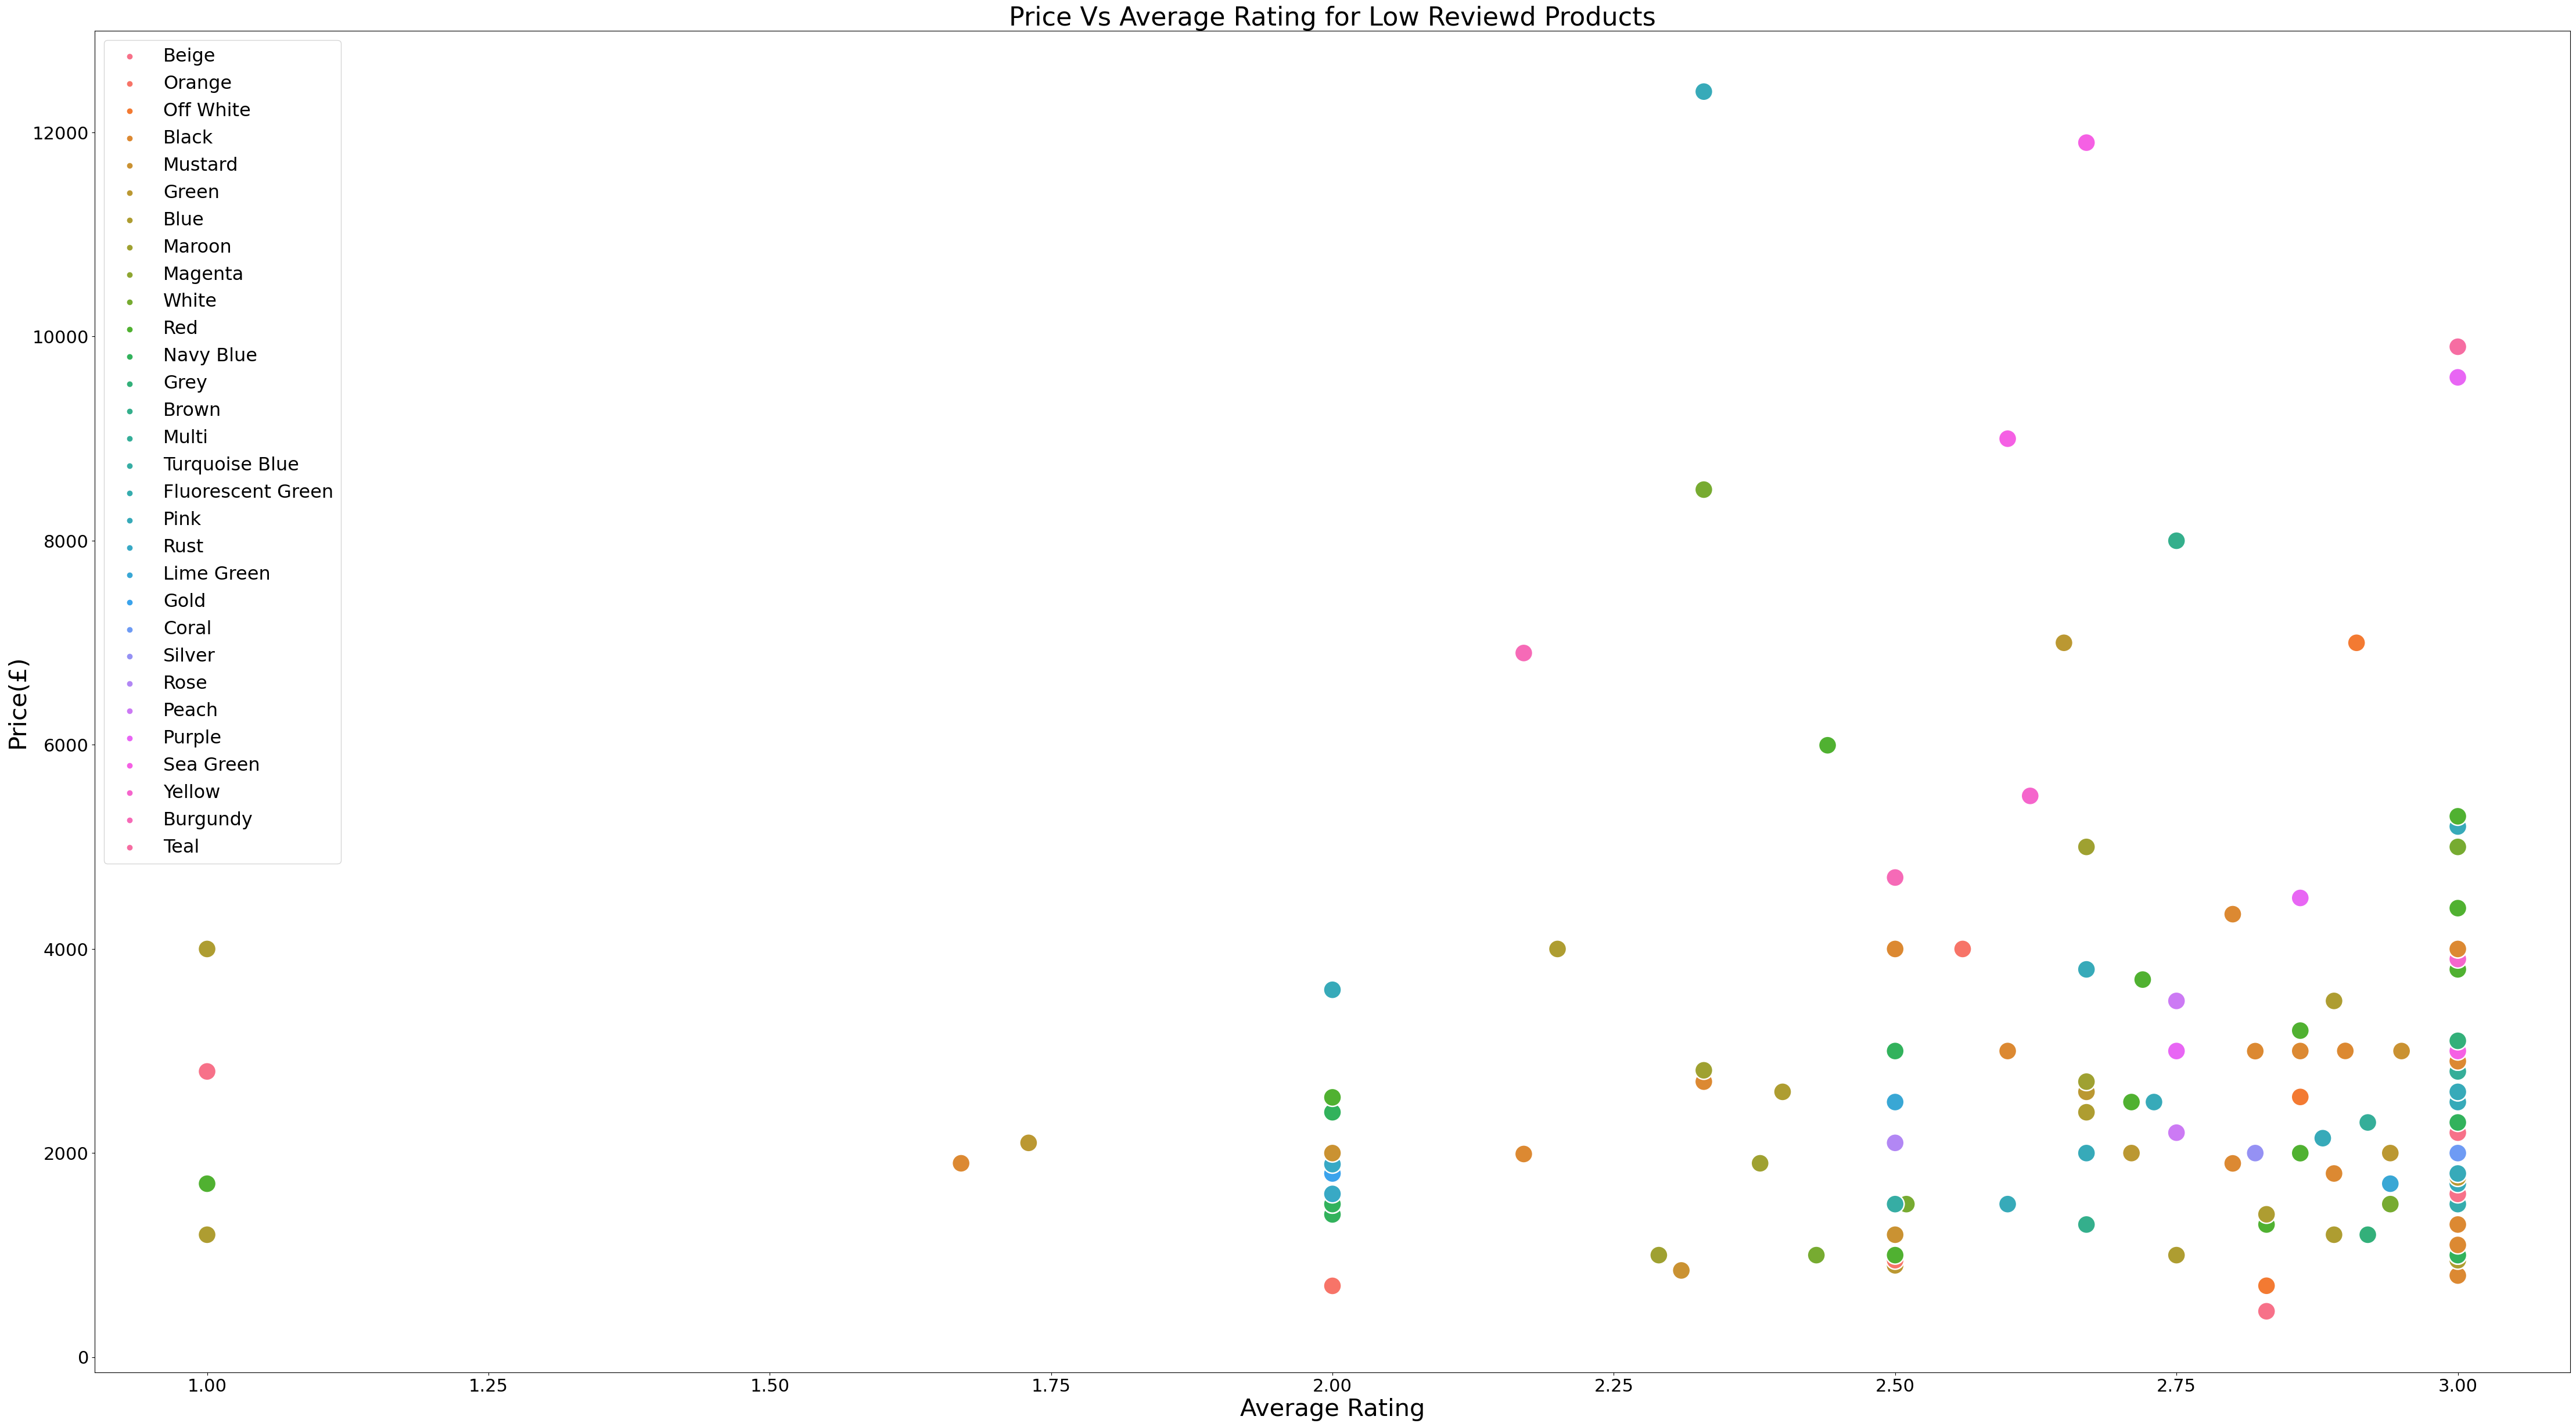

In [160]:
# Scatter plot done with price against average rating

sb.scatterplot(data=review_prdts_df, x="avg_rating", y="price", hue=review_prdts_df['colour'], s=500)

plt.ylabel('Price(£)', fontsize=30)
plt.xlabel('Average Rating', fontsize=30)
plt.legend(fontsize=23);

plt.xticks(fontsize=22, rotation = 0);
plt.yticks(fontsize=22);

plt.title('Price Vs Average Rating for Low Reviewd Products', fontsize=32)

from matplotlib import rcParams
rcParams['figure.figsize'] = 55,30

>  Fashion brands could use this visual presentation to easily determine which colours have poor ratings and the relationship between average rating and price of the poorly reviewed products. They could also determine the products in most need of improvement and see where discounts can be given in order to improve the appeal of given products.

In [161]:
# Created the reviewprdts csv file for further analysis on Power BI

review_prdts_df.to_csv('reviewprdts.csv', index=False)